In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

# Q1 Solution

In [166]:
books_without_original_title = books['original_title'].isnull().sum()

print(f'The number of books without an original title: {books_without_original_title}')

The number of books without an original title: 36


# Q2 Solution

In [167]:
books = books.dropna(subset=['original_title'])
books_ids_with_title = books['book_id'].tolist()
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books_ids_with_title)]
ratings = ratings[ratings['book_id'].isin(books_ids_with_title)]
unique_books_count = books['book_id'].nunique()

print(f'The number of unique books after removing records with null values for original_title: {unique_books_count}')

The number of unique books after removing records with null values for original_title: 363


# Q3 Solution

In [168]:
unique_users = ratings['user_id'].nunique()
print(f"Number of unique users in the ratings dataset: {unique_users}")

Number of unique users in the ratings dataset: 40573


# Q4 Solution

In [169]:
unique_tags = book_tags['tag_id'].nunique()
print(f"Number of unique tags in the book_tags dataset: {unique_tags}")

Number of unique tags in the book_tags dataset: 100


# Q5 Solution

In [170]:
tag_counts = book_tags['tag_id'].value_counts()
most_frequent_tag_id = tag_counts.idxmax()

if tag_counts.duplicated().any():
    most_frequent_tag_id = tag_counts[tag_counts == tag_counts.max()].index.min()

print(f'Most frequently used tag_id: {most_frequent_tag_id}')

Most frequently used tag_id: 199


# Q6 Solution

In [171]:
most_tagged_book_id = book_tags['count'].idxmax()
most_tagged_book_title = books.loc[books['book_id'] == book_tags.loc[most_tagged_book_id, 'goodreads_book_id'], 'title'].values[0]
print(f"6) The book with the most number of tags is: {most_tagged_book_title}")

6) The book with the most number of tags is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


# Q7 Solution

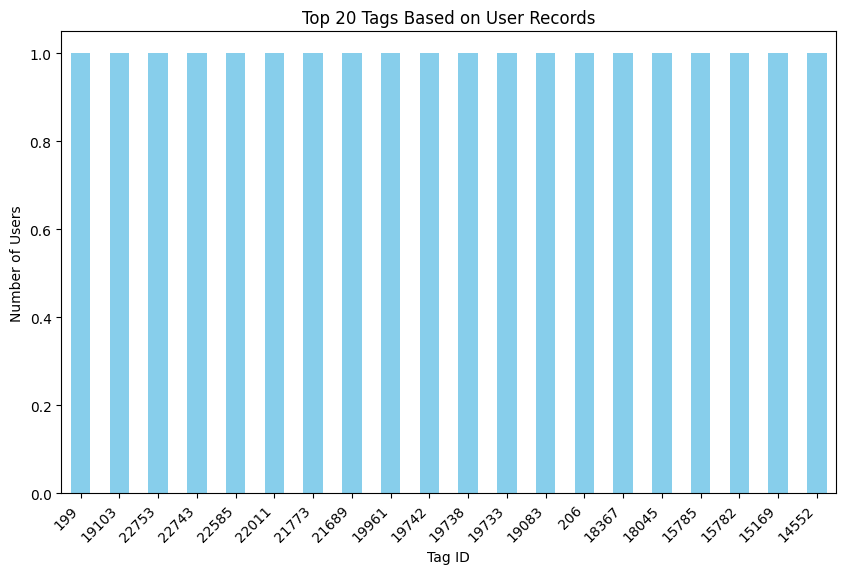

In [172]:
tag_user_counts = book_tags.groupby('tag_id')['goodreads_book_id'].nunique()

top_20_tags = tag_user_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags Based on User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.show()